<a href="https://colab.research.google.com/github/leekh8/Colaboratory/blob/main/ex03_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool/'

/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool


In [ ]:
# @title 폐암 데이터셋을 이용한 이진 분류
# @markdown - 폴란드 브로츠와프 의과대학에서 2013년 제공한 폐암 수술환자 데이터셋 (2007 ~ 2011)
# @markdown - 특성데이터 17개, 라벨데이터 1개
# @markdown - 데이터 470명
# @markdown - 특성 종류: 환자번호, 종양유형, 폐활량, 호기량, 신체활력상태, 통증여부, 객혈여부, 호흡곤란여부, 기침, 약화, 종양크기, 당뇨, 심근경색, 말초동맥질환, 흡연, 천식, 나이

In [4]:
# @title 데이터 가져오기
import pandas as pd
data = pd.read_csv('./Data/ThoraricSurgery.csv',
                   header = None, index_col = 0,
                   names = ['환자번호', '종양유형', '폐활량', '호기량', '신체활력상태', '통증여부', '객혈여부', '호흡곤란여부',
                            '기침', '약화', '종양크기', '당뇨', '심근경색', '말초동맥질환', '흡연', '천식', '나이', '생존'])
data.head()

,종양유형,폐활량,호기량,신체활력상태,통증여부,객혈여부,호흡곤란여부,기침,약화,종양크기,당뇨,심근경색,말초동맥질환,흡연,천식,나이,생존
환자번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [5]:
# @title 특성 데이터와 라벨 데이터 분리
X = data.iloc[ : , : -1]
y = data.iloc[ : , -1]

X.shape, y.shape

((470, 16), (470,))

In [6]:
# @title 신경망 설계
from tensorflow.keras.models import Sequential
# Dense: 신경망 층을 정의하는 라이브러리
# Activation: 활성화 함수를 정의하는 라이브러리
from tensorflow.keras.layers import Dense, Activation

# 빈 신경망 생성
model = Sequential()

# @markdown # 기본 신경망 층의 구성

# @markdown ## 입력층
# @markdown  - 데이터 입력받음 - 데이터의 구조, 다음층으로 넘길 크기

# @markdown ## 은닉층
# @markdown  - 데이터에서 특성 데이터 추출 - 여러층으로 구성 가능
# @markdown - ANN: 은닉층 1개
# @markdown - DNN: 은닉층 여러개

# @markdown ## 출력층
# @markdown  - 최종 데이터 출력 - 활성화 함수의 종류(회귀, 이진/다진 분류)에 따라 다름

# @markdown ---

# @markdown # 입력층

# @markdown ## units
# @markdown - perceptron의 수 (내 맘대로)

# @markdown ## input_dim
# @markdown - 특성 데이터의 크기 (x.shape[1])

# 신경망 층 생성해(Dense) 신경망에 추가(add)

# 입력층
model.add(Dense(units = 32, input_dim = 16))
model.add(Activation('sigmoid'))

# @markdown ---

# 은닉층
model.add(Dense(units = 16))
model.add(Activation('sigmoid'))

# @markdown # 출력층의 units
# @markdown - 라벨 데이터의 수 (y의 크기)

# 출력층
model.add(Dense(units = 1))
model.add(Activation('sigmoid'))

# @markdown # 출력층의 Activation

# @markdown ## 회귀
# @markdown - 쓰지 않은 - 그냥 꺼내면 된다 (linear)

# @markdown ## 이진 분류
# @markdown - y를 원핫인코딩 하지 않을 때: sigmoid
# @markdown - y를 원핫인코딩 할 때: softmax

# @markdown ## 다진 분류
# @markdown - 당연히 원핫인코딩을 했을것이므로 softmax

# @markdown ---

# 모델의 구조 보기
model.summary()
# @markdown # summary

# @markdown ## 입력층의 param 개수
# @markdown - (16 * 32) = 512 (w) + 32 (b) = 544

# @markdown ## 은닉층의 param 개수
# @markdown - (32 * 16) = 512 (w) + 16 (b) = 528

# @markdown ## 출력층의 param 개수
# @markdown - (16 * 1) (w) + 1 (b) = 17

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainabl

In [7]:
# @title 모델 컴파일

# @markdown # loss
# @markdown ### 손실 함수
# @markdown - 회귀
# @markdown  - mean_squared_error / mse
# @markdown - 이진 분류
# @markdown  - binary_crossentropy
# @markdown - 다진 분류
# @markdown  - categorical_crossentropy

# @markdown # optimizer
# @markdown ### 최적화 함수 (경사하강법의 종류)
# @markdown - rmsprop
# @markdown - dadm

# @markdown # metrics
# @markdown ### 평가함수
# @markdown - loss
# @markdown - accuracy / acc
# @markdown - 회귀의 경우 알아서 metrics 하기때문에 생략 가능

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# @markdown ---

In [8]:
# @title 파라미터(w, b) 확인
# @markdown # 초기 파라미터는 랜덤 값으로 설정
print(model.get_layer('dense').weights)

[<tf.Variable 'dense/kernel:0' shape=(16, 32) dtype=float32, numpy=
array([[-0.09006554, -0.10740533, -0.11836116, -0.13366072,  0.07633165,
        -0.25881672, -0.0607186 , -0.32386422, -0.22885165, -0.30320036,
         0.09188956, -0.19545996, -0.21705323, -0.05362099, -0.2611652 ,
         0.3013648 ,  0.28632906,  0.34949782,  0.26790342, -0.14393274,
         0.29813245, -0.30431154, -0.05066204, -0.07467756, -0.04308638,
         0.28709516,  0.05083525, -0.12647223, -0.25243965, -0.20466417,
         0.06820354,  0.11395842],
       [-0.18716934,  0.34884843, -0.22655305,  0.21665552, -0.18574166,
        -0.25850222, -0.11453709, -0.15798628, -0.04535583, -0.07971966,
        -0.12370074, -0.11612552, -0.11017279,  0.17738661, -0.27378762,
        -0.20914488, -0.14031284,  0.08278096,  0.16824397, -0.21938209,
        -0.07826409, -0.17231199,  0.04817376, -0.155314  ,  0.14954594,
         0.269676  , -0.117009  , -0.23688072, -0.03167319, -0.2955311 ,
        -0.17820522, 

In [ ]:
# @title 학습
h = model.fit(X, y, epochs = 3000, batch_size = 20)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
24/24 [==============================] - 0s 5ms/step - loss: 0.1269 - acc: 0.9574
Epoch 4562/8000
24/24 [==============================] - 0s 5ms/step - loss: 0.1308 - acc: 0.9574
Epoch 4563/8000
24/24 [==============================] - 0s 6ms/step - loss: 0.1267 - acc: 0.9489
Epoch 4564/8000
24/24 [==============================] - 0s 7ms/step - loss: 0.1252 - acc: 0.9596
Epoch 4565/8000
24/24 [==============================] - 0s 4ms/step - loss: 0.1360 - acc: 0.9468
Epoch 4566/8000
24/24 [==============================] - 0s 6ms/step - loss: 0.1327 - acc: 0.9553
Epoch 4567/8000
24/24 [==============================] - 0s 6ms/step - loss: 0.1267 - acc: 0.9511
Epoch 4568/8000
24/24 [==============================] - 0s 4ms/step - loss: 0.1251 - acc: 0.9596
Epoch 4569/8000
24/24 [==============================] - 0s 2ms/step - loss: 0.1255 - acc: 0.9553
Epoch 4570/8000
24/24 [==============================] - 0s 4ms/step - loss: 0.1320 - acc: 0.9532


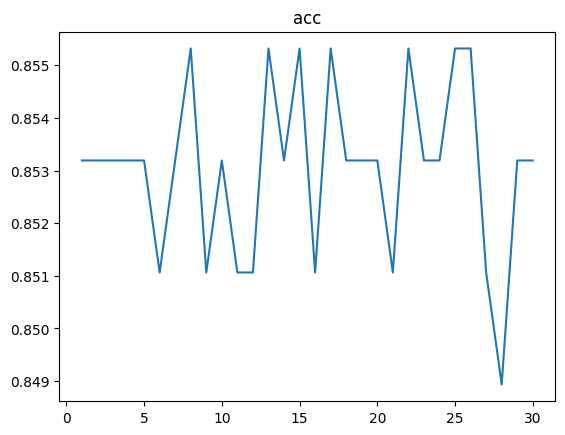

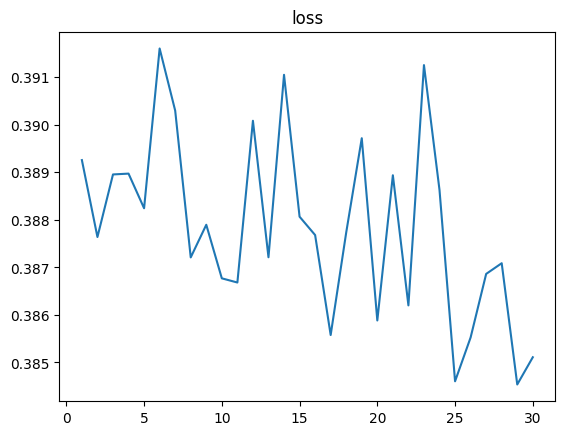

In [13]:
# @title 시각화하기
# @markdown # h
# @markdown - Epoch, loss, acc 값 반환

import matplotlib.pyplot as plt
import numpy as np

# acc, loss 값 가져오기
acc = h.history['acc']
loss = h.history['loss']

# x축 값 설정
ep = np.arange(1, len(loss) + 1)

# acc, loss 결과값 시각화하기
plt.title('acc')
plt.plot(ep, acc)
plt.show()

plt.title('loss')
plt.plot(ep, loss)
plt.show()

In [ ]:
# @title 폐암 데이터셋을 이용한 이진 분류 - y 원핫인코딩
y_en = pd.get_dummies(y)
y.shape, y_en.shape

In [ ]:
y_en.head()

In [ ]:
# @title 신경망 설계

# 빈 신경망 생성
model2 = Sequential()

# 입력층
model2.add(Dense(units = 32, input_dim = 16))
model2.add(Activation('sigmoid'))

# 은닉층
model2.add(Dense(units = 16))
model2.add(Activation('sigmoid'))

# 출력층
model2.add(Dense(units = 2))
model2.add(Activation('softmax'))

# 모델의 구조 보기
model2.summary()

In [ ]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
print(model2.get_layer('dense').weights)

In [ ]:
# @title 학습
h2 = model2.fit(X, y_en, epochs = 3000, batch_size = 20)

In [ ]:
# @title 시각화하기

# acc, loss 값 가져오기
acc2 = h2.history['acc']
loss2 = h2.history['loss']

# x축 값 설정
ep2 = np.arange(1, len(loss2) + 1)

# acc, loss 결과값 시각화하기
plt.title('acc')
plt.plot(ep2, acc2)
plt.show()

plt.title('loss')
plt.plot(ep2, loss2)
plt.show()